<a href="https://colab.research.google.com/github/wendirad/weekThree/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# converting txt to csv
input_file = '/content/MachineLearningRating_v3.txt'
output_file = 'data.csv'


with open(input_file, 'r') as txt_file, open(output_file, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in txt_file:
        if line.strip():
            row = line.strip().split('|')
            csv_writer.writerow(row)

print(f"Conversion completed. CSV file saved as {output_file}")

Conversion completed. CSV file saved as data.csv


In [3]:
data = pd.read_csv('/content/data.csv')
data.head()

<ipython-input-3-58452558f374>:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/data.csv')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data Summarization

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
# Define the numerical columns for analysis
numerical_cols = ["TotalPremium", "TotalClaims", "CalculatedPremiumPerTerm", "SumInsured", "cubiccapacity", "kilowatts"]

# Generate descriptive statistics for numerical columns
stats_summary = data[numerical_cols].describe()

# Calculate variability metrics (Standard Deviation, Variance)
variability_metrics = data[numerical_cols].agg(['std', 'var'])

# Display descriptive statistics in a tabular format
print("Descriptive Statistics:")
print(tabulate(stats_summary, headers="keys", tablefmt="fancy_grid"))

# Display variability metrics in a tabular format
print("\nVariability Metrics (Standard Deviation, Variance):")
print(tabulate(variability_metrics.T, headers=["Metric", "Standard Deviation", "Variance"], tablefmt="fancy_grid"))

# Review data structure
column_types = data.dtypes.reset_index()
column_types.columns = ["Column", "Data Type"]

print("\nData Structure (Data Types):")
print(tabulate(column_types, headers="keys", tablefmt="fancy_grid"))

# Extract and display categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
cat_cols_df = pd.DataFrame(cat_cols, columns=["Categorical Columns"])

print("\nCategorical Columns:")
print(tabulate(cat_cols_df, headers="keys", tablefmt="fancy_grid"))

# Extract and display numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_cols_df = pd.DataFrame(num_cols, columns=["Numerical Columns"])

print("\nNumerical Columns:")
print(tabulate(num_cols_df, headers="keys", tablefmt="fancy_grid"))


Descriptive Statistics:
╒═══════╤════════════════╤═════════════════╤════════════════════════════╤══════════════════╤═════════════════╤═════════════╕
│       │   TotalPremium │     TotalClaims │   CalculatedPremiumPerTerm │       SumInsured │   cubiccapacity │   kilowatts │
╞═══════╪════════════════╪═════════════════╪════════════════════════════╪══════════════════╪═════════════════╪═════════════╡
│ count │     1.0001e+06 │      1.0001e+06 │                 1.0001e+06 │      1.0001e+06  │      999546     │ 999546      │
├───────┼────────────────┼─────────────────┼────────────────────────────┼──────────────────┼─────────────────┼─────────────┤
│ mean  │    61.9055     │     64.8612     │               117.876      │ 604173           │        2466.74  │     97.2079 │
├───────┼────────────────┼─────────────────┼────────────────────────────┼──────────────────┼─────────────────┼─────────────┤
│ std   │   230.285      │   2384.07       │               399.702      │      1.50833e+06 │         

## Data Quality Assessment

In [6]:
# Compute missing value counts and percentages
missing_counts = data.isnull().sum()
missing_percentage = (missing_counts / len(data)) * 100
missing_data_summary = pd.DataFrame({
    "Column": missing_counts.index,
    "Missing Values": missing_counts.values,
    "Missing Percentage (%)": missing_percentage.round(2)
})

missing_data_summary = missing_data_summary[missing_data_summary["Missing Values"] > 0]

# Display the missing values summary in a table
print("Summary of Missing Values:")
print(tabulate(missing_data_summary, headers="keys", tablefmt="fancy_grid"))


Summary of Missing Values:
╒═════════════════════════╤═════════════════════════╤══════════════════╤══════════════════════════╕
│                         │ Column                  │   Missing Values │   Missing Percentage (%) │
╞═════════════════════════╪═════════════════════════╪══════════════════╪══════════════════════════╡
│ Bank                    │ Bank                    │           145961 │                    14.59 │
├─────────────────────────┼─────────────────────────┼──────────────────┼──────────────────────────┤
│ AccountType             │ AccountType             │            40232 │                     4.02 │
├─────────────────────────┼─────────────────────────┼──────────────────┼──────────────────────────┤
│ MaritalStatus           │ MaritalStatus           │             8259 │                     0.83 │
├─────────────────────────┼─────────────────────────┼──────────────────┼──────────────────────────┤
│ Gender                  │ Gender                  │             9536 │ 

## **Univariate Analysis**
- Histograms for Numerical Columns: Histograms help in understanding the distribution of numerical variables
- Bar Charts for Categorical Columns: Bar charts show the frequency of different categories in categorical columns

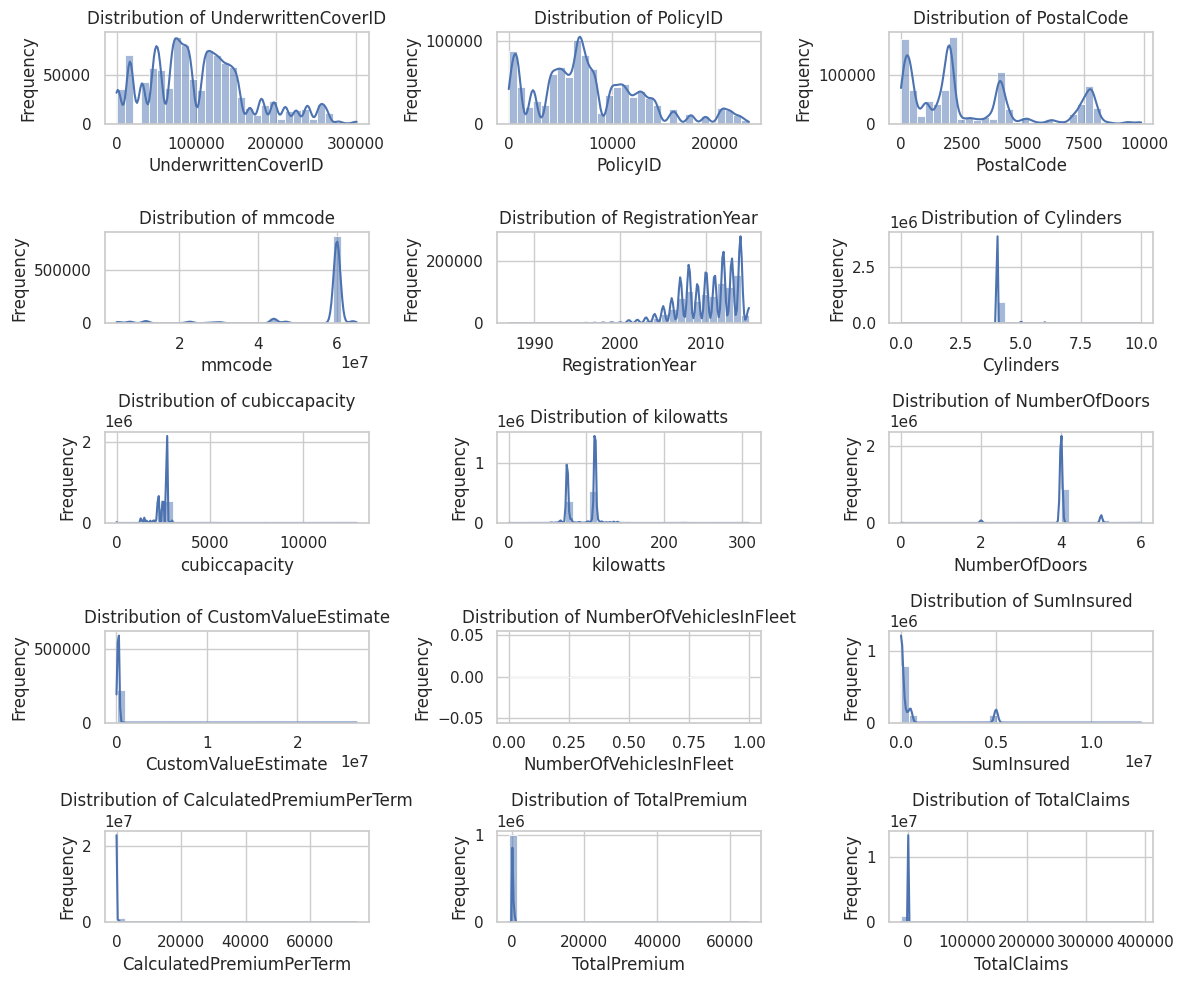

In [7]:
# Set Seaborn style for the plots
sns.set(style="whitegrid")

# Select numerical columns for plotting
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows required for subplots
num_plots = len(numerical_columns)
num_rows = (num_plots + 2) // 3  # Ensure there is enough space for the plots

# Initialize the figure with appropriate size
plt.figure(figsize=(12, 10))

# Iterate through numerical columns and create histograms
for index, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, index)  # Arrange subplots dynamically
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()


In [10]:
# Correlation Matrix: Calculate correlation for numerical variables
correlation_matrix = data[['TotalPremium', 'TotalClaims', 'PostalCode']].copy()
data['PostalCode'] = data['PostalCode'].astype('category')
correlation_matrix['PostalCode'] = data['PostalCode'].cat.codes

# Calculate the correlation matrix
corr = correlation_matrix.corr()

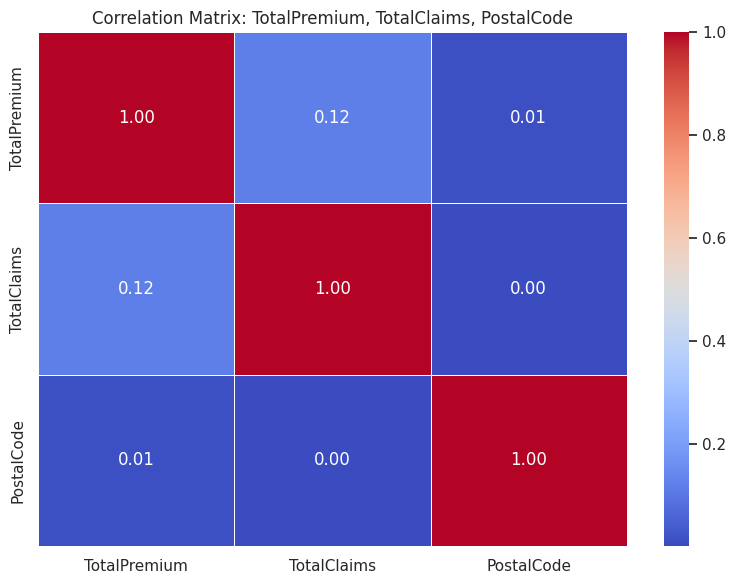

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f',cbar=True)
plt.title('Correlation Matrix: TotalPremium, TotalClaims, PostalCode')
plt.tight_layout()
plt.show()
